In [1470]:
#!pip install pygrowup

In [1471]:
#pip install dataframe-image

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# OJO! CON LOS reset_index()

In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pygrowup import Calculator
# helpers contains optional utilities for formatting dates, etc
from pygrowup import helpers

#import dataframe_image as dfi

#pd.set_option('display.max_rows', None)

In [2]:
def defino_rango(edad_dias):
    edad_meses = edad_dias/30.5
    
    if edad_meses <= 6:
        return 'nacimiento - 6 meses'
    
    elif edad_meses <= 24:
        return '6 meses - 2 años'
    
    elif edad_meses <= 60:
        return '2 años - 5 años'
    
    elif edad_meses <= 228:
        return '5 años - 19 años'
    
    #elif edad_meses <= 228:
        #return '10 años - 19 años'
    
    else:
        return 'fuera de rango'

In [312]:
def defino_rango_extra(edad_dias):
    edad_meses = edad_dias/30.5
    
    if edad_meses <= 6:
        return 'nacimiento - 6 meses'
    
    elif edad_meses <= 24:
        return '6 meses - 2 años'
    
    elif edad_meses <= 60:
        return '2 años - 5 años'
    
    elif edad_meses <= 120:
        return '5 años - 10 años'
    
    elif edad_meses <= 228:
        return '10 años - 19 años'
    
    else:
        return 'fuera de rango'

In [141]:
filename = 'data/controles.csv'
df = pd.read_csv(filename, sep=';')

In [142]:
df.head()

,id_individuo,sexo,peso,talla,edad_dias
0,1,F,"18,6",104.0,1964.0
1,1,F,"23,5",115.0,2615.0
2,2,M,"7,8",59.0,168.0
3,2,M,"7,8",66.0,193.0
4,3,F,"34,6",141.0,3573.0


In [143]:
df.shape

(1161406, 5)

In [144]:
shape_original = df.shape[0]

In [145]:
df.info() 
# sexo tiene 187 nulos
# peso       174
# talla      114
# edad        13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161406 entries, 0 to 1161405
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   id_individuo  1161406 non-null  int64  
 1   sexo          1161219 non-null  object 
 2   peso          1161232 non-null  object 
 3   talla         1161292 non-null  float64
 4   edad_dias     1161393 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 44.3+ MB


In [146]:
# Pasar peso a float - OJO con la coma!
df['peso'] = df['peso'].replace(',', '.', regex=True)
df['peso'] = df['peso'].apply(lambda x: float(x))

In [147]:
type(df['peso'][0])

numpy.float64

### Individuo

In [148]:
df['id_individuo'].value_counts() #La cantidad de mediciones por individuo va de 2 a 15

260002    15
74564     15
20569     15
147054    15
116850    15
          ..
148708     2
148710     2
148712     2
148716     2
150001     2
Name: id_individuo, Length: 300000, dtype: int64

In [149]:
print('cant. valores:', len(df['id_individuo'].value_counts())) # Se corresponde con los 300 mil individuos 
print('min:', df['id_individuo'].min())
print('max:', df['id_individuo'].max())

cant. valores: 300000
min: 1
max: 300000


### Edad (días)

In [150]:
print(df['edad_dias'].min()) # Hasta que edad es válido ??? 19
print(df['edad_dias'].max())
# 7304 días - 20 años

4.0
7304.0


In [151]:
print('cant. nulos:', df[df['edad_dias'].isnull()].shape[0])
df[df['edad_dias'].isnull()]

cant. nulos: 13


,id_individuo,sexo,peso,talla,edad_dias
23094,5935,F,31.4,58.0,NaN
67648,17658,M,20.6,114.0,NaN
73241,19111,F,13.3,98.0,NaN
141877,36793,M,10.4,80.0,NaN
187290,48523,F,3.9,50.0,NaN
350939,90758,F,3.1,49.0,NaN
351487,90903,M,8.5,65.0,NaN
583484,150786,M,10.3,77.0,NaN
651387,168261,F,14.6,95.0,NaN
723246,186693,M,11.5,79.0,NaN


In [152]:
#df.dropna(subset=['edad_dias'], inplace=True)

In [153]:
df['edad_dias'].describe([.01, .05, .10, .25, .5, .75, .90, .95, .99]) 
# hasta el tercer cuartil cubre 6 años de edad
# ver percentiles 90-95-99

count    1.161393e+06
mean     1.669827e+03
std      1.625521e+03
min      4.000000e+00
1%       2.400000e+01
5%       7.000000e+01
10%      1.380000e+02
25%      3.720000e+02
50%      1.134000e+03
75%      2.469000e+03
90%      4.205000e+03
95%      5.277000e+03
99%      6.580000e+03
max      7.304000e+03
Name: edad_dias, dtype: float64

In [154]:
df[df['edad_dias']>6935].shape[0]

4660

In [157]:
(4660 * 100) / 1161406

0.4012378100337005

In [155]:
# elimino los que están fuera de rango
df = df[df['edad_dias']<=6935]

In [168]:
df['id_individuo'].nunique()

299558

### Sexo

In [158]:
df['sexo'].unique() 
# Hacer match F-f y M-m
# Verificar si hay más info para los individuos con k y sino convertir a Nan

array(['F', 'M', nan, 'f', 'm', 'k'], dtype=object)

In [159]:
df['sexo'].value_counts() 
# 0.5051
# 0.4948
# 

F    582788
M    573718
f        20
m        18
k         2
Name: sexo, dtype: int64

In [160]:
df[df['sexo']=='k']

,id_individuo,sexo,peso,talla,edad_dias
364821,94319,k,52.5,161.0,4869.0
499713,129122,k,19.4,110.0,1924.0


In [161]:
df[df['id_individuo']==94319] # es masculino

,id_individuo,sexo,peso,talla,edad_dias
364821,94319,k,52.5,161.0,4869.0
364822,94319,M,52.5,151.0,5008.0


In [162]:
df.loc[364821, 'sexo'] = 'M'

In [163]:
df[df['id_individuo']==129122] # es femenino

,id_individuo,sexo,peso,talla,edad_dias
499706,129122,F,7.1,70.0,378.0
499707,129122,F,8.2,76.0,532.0
499708,129122,F,13.5,89.0,776.0
499709,129122,F,10.2,86.0,994.0
499710,129122,F,14.3,96.0,1161.0
499711,129122,F,11.2,91.0,1197.0
499712,129122,F,18.4,109.0,1894.0
499713,129122,k,19.4,110.0,1924.0
499714,129122,F,21.4,116.0,2324.0


In [164]:
df.loc[499713, 'sexo'] = 'F'

In [165]:
df['sexo'] = df['sexo'].replace('f','F',regex=True)
df['sexo'] = df['sexo'].replace('m','M',regex=True)
df['sexo'].value_counts()

F    582809
M    573737
Name: sexo, dtype: int64

In [166]:
df['id_individuo'].nunique()

299558

In [169]:
df.groupby(['id_individuo', 'sexo']).count()['edad_dias'].reset_index().shape[0] 
# si hubiese solo uno para cada uno la longitud de esto debería ser igual a la cantidad de individuos únicos - y no lo es

299576

In [170]:
df_sexo = df.groupby(['id_individuo', 'sexo']).count()['edad_dias'].reset_index()

In [171]:
ids_indiv = df_sexo[df_sexo.duplicated(['id_individuo'])]['id_individuo']

In [172]:
len(ids_indiv)

18

In [173]:
df_sexo[df_sexo['id_individuo'].isin(ids_indiv)]

,id_individuo,sexo,edad_dias
31936,31984,F,1
31937,31984,M,5
40644,40707,F,1
40645,40707,M,3
58706,58796,F,1
58707,58796,M,3
60244,60333,F,1
60245,60333,M,3
95576,95713,F,1
95577,95713,M,8


In [174]:
df[df['id_individuo'].isin(ids_indiv)]['id_individuo'].value_counts() 

95713     9
130574    7
31984     6
217841    5
174924    5
166515    5
279796    5
149697    4
40707     4
60333     4
181006    4
58796     4
251251    4
157531    4
157296    3
165815    3
205012    3
102791    2
Name: id_individuo, dtype: int64

In [175]:
df[df['id_individuo']==102791]

,id_individuo,sexo,peso,talla,edad_dias
397539,102791,M,19.4,110.0,1881.0
397540,102791,F,33.7,136.0,3438.0


In [176]:
# voy a eliminar este individuo
df = df[df['id_individuo']!=102791]

In [178]:
df[df['id_individuo']==95713]
df.loc[370247, 'sexo'] = 'M'

In [179]:
df[df['id_individuo']==130574]
df.loc[505323, 'sexo'] = 'F'

In [180]:
df[df['id_individuo']==31984]
df.loc[123285, 'sexo'] = 'M'

In [181]:
df[df['id_individuo']==279796]
df.loc[1082913, 'sexo'] = 'F'

In [182]:
df[df['id_individuo']==174924]
df.loc[677275, 'sexo'] = 'F'

In [183]:
df[df['id_individuo']==166515]
df.loc[644583, 'sexo'] = 'F'

In [184]:
df[df['id_individuo']==217841]
df.loc[843440, 'sexo'] = 'F'

In [185]:
df[df['id_individuo']==181006]
df.loc[701127, 'sexo'] = 'F'

In [186]:
df[df['id_individuo']==157531]
df.loc[609817, 'sexo'] = 'M'

In [187]:
df[df['id_individuo']==40707]
df.loc[156995, 'sexo'] = 'M'

In [188]:
df[df['id_individuo']==149697]
df.loc[579273, 'sexo'] = 'F'

In [189]:
df[df['id_individuo']==60333]
df.loc[232917, 'sexo'] = 'M'

In [190]:
df[df['id_individuo']==58796]
df.loc[226892, 'sexo'] = 'M'

In [191]:
df[df['id_individuo']==251251]
df.loc[972768, 'sexo'] = 'M'

In [192]:
df[df['id_individuo']==205012]
df.loc[794042, 'sexo'] = 'M'

In [193]:
df[df['id_individuo']==165815]
df.loc[641996, 'sexo'] = 'M'

In [194]:
df[df['id_individuo']==157296]
df.loc[608886, 'sexo'] = 'M'

In [195]:
print('cant. nulos:', df[df['sexo'].isnull()].shape[0])
df[df['sexo'].isnull()]

cant. nulos: 187


,id_individuo,sexo,peso,talla,edad_dias
1844,492,NaN,66.0,169.0,6705.0
15186,3895,NaN,14.3,100.0,1519.0
17158,4398,NaN,7.3,69.0,197.0
26113,6733,NaN,5.8,61.0,178.0
32343,8377,NaN,10.7,76.0,367.0
...,...,...,...,...,...
1128570,291529,NaN,10.0,74.0,225.0
1137707,293872,NaN,7.9,71.0,336.0
1140867,294732,NaN,26.8,120.0,3021.0
1143890,295513,NaN,4.8,57.0,110.0


In [196]:
ids_sexo_nan = df[df['sexo'].isna()]['id_individuo'].unique().tolist()

In [197]:
len(ids_sexo_nan)

186

In [213]:
df[df['id_individuo'].isin(ids_sexo_nan)].dropna(subset=['sexo'])['id_individuo'].nunique()
# esto quiere decir que los 186 con nulos tienen otras mediciones con las que se pueden salvar los registros

186

In [214]:
# de esta forma obtengo el par único id_individuo-sexo
dict_ind_sexo = df[df['id_individuo'].isin(ids_sexo_nan)].groupby(['id_individuo', 'sexo']).count().reset_index()[['id_individuo', 'sexo']].set_index('id_individuo').to_dict('index')
#df[df['id_individuo'].isin(ids_sexo_nan)].groupby(['id_individuo', 'sexo']).count().reset_index()[['id_individuo', 'sexo']].set_index('id_individuo').to_dict('index')

{492: {'sexo': 'M'},
 3895: {'sexo': 'F'},
 4398: {'sexo': 'M'},
 6733: {'sexo': 'M'},
 8377: {'sexo': 'M'},
 8903: {'sexo': 'F'},
 10398: {'sexo': 'M'},
 10938: {'sexo': 'F'},
 11370: {'sexo': 'M'},
 12654: {'sexo': 'M'},
 13170: {'sexo': 'F'},
 13733: {'sexo': 'F'},
 15969: {'sexo': 'M'},
 16368: {'sexo': 'F'},
 16533: {'sexo': 'F'},
 18279: {'sexo': 'F'},
 19270: {'sexo': 'F'},
 20106: {'sexo': 'F'},
 20749: {'sexo': 'F'},
 24709: {'sexo': 'F'},
 25261: {'sexo': 'M'},
 29550: {'sexo': 'M'},
 32825: {'sexo': 'M'},
 33007: {'sexo': 'M'},
 33420: {'sexo': 'F'},
 33546: {'sexo': 'M'},
 34387: {'sexo': 'M'},
 36823: {'sexo': 'M'},
 37298: {'sexo': 'F'},
 41217: {'sexo': 'F'},
 43079: {'sexo': 'F'},
 44751: {'sexo': 'F'},
 44868: {'sexo': 'F'},
 45482: {'sexo': 'F'},
 45770: {'sexo': 'F'},
 46530: {'sexo': 'F'},
 48199: {'sexo': 'M'},
 50815: {'sexo': 'M'},
 55298: {'sexo': 'F'},
 56267: {'sexo': 'M'},
 56416: {'sexo': 'M'},
 61237: {'sexo': 'M'},
 61567: {'sexo': 'M'},
 69698: {'sexo': '

In [219]:
df['sexo'] = df.apply(lambda row: dict_ind_sexo[row['id_individuo']]['sexo'] if (row['id_individuo'] in ids_sexo_nan) else row['sexo'], axis=1)

In [220]:
df[df['sexo'].isnull()] # verificación

,id_individuo,sexo,peso,talla,edad_dias


In [65]:
#df.dropna(subset=['sexo'], inplace=True)

In [224]:
# todo esto tarda así que me voy a hacer una copia por las dudas
df_copy = df.copy()

### Peso

In [225]:
print(df['peso'].min()) # En qué unidad están ??? KG
print(df['peso'].max())
# Cuál serían el mínimo y máximo valor aceptable?

0.0
12597.9


In [226]:
df[df['peso'] == 0].shape[0] 
# Hay 6 registros con peso 0

6

In [227]:
print('cant. nulos:', df[df['peso'].isnull()].shape[0])
df[df['peso'].isnull()]

cant. nulos: 172


,id_individuo,sexo,peso,talla,edad_dias
1532,408,F,NaN,169.0,5645.0
4128,1065,M,NaN,101.0,1307.0
9086,2329,M,NaN,86.0,768.0
14746,3781,F,NaN,62.0,165.0
27901,7198,F,NaN,126.0,2282.0
...,...,...,...,...,...
1103129,284983,F,NaN,161.0,6163.0
1113606,287656,F,NaN,107.0,1465.0
1122015,289828,M,NaN,85.0,809.0
1142888,295259,F,NaN,126.0,3330.0


### Altura (talla)

In [228]:
print(df['talla'].min()) # En qué unidad están ??? CM
print(df['talla'].max())
# Cuál serían el mínimo y máximo valor aceptable?

19.0
251.0


In [229]:
df[df['talla']<35]

,id_individuo,sexo,peso,talla,edad_dias
15923,4076,M,8.9,30.0,341.0
20461,5273,M,13.7,34.0,564.0
28397,7335,F,22.1,22.0,2216.0
28903,7466,F,2.7,32.0,23.0
32958,8542,M,12.6,23.0,730.0
...,...,...,...,...,...
1136317,293510,M,19.4,28.0,2003.0
1137532,293828,M,8.8,22.0,403.0
1140204,294555,M,31.9,31.0,2646.0
1147984,296572,F,22.8,24.0,2790.0


In [230]:
df[df['talla']==251]

,id_individuo,sexo,peso,talla,edad_dias
68562,17902,F,9.6,251.0,315.0


In [58]:
print('cant. nulos:', df[df['talla'].isnull()].shape[0])
df[df['talla'].isnull()]

cant. nulos: 114


,id_individuo,sexo,peso,talla,edad_dias
389,105,F,33.7,NaN,2576.0
19368,4986,M,3.9,NaN,29.0
19736,5084,F,17.5,NaN,1503.0
21847,5615,F,49.4,NaN,4760.0
25305,6518,M,13.3,NaN,762.0
...,...,...,...,...,...
1119690,289214,M,13.1,NaN,818.0
1130327,291968,M,16.1,NaN,1588.0
1145304,295881,M,7.6,NaN,256.0
1148203,296626,M,21.6,NaN,2296.0


# Nulos

In [255]:
df.shape[0]

1156731

In [256]:
df.dropna(inplace=True) # capaz esto hacerlo al principio pero dejando de lado la columna 'sexo'

In [257]:
df.shape[0]

1156447

In [258]:
1156731 - 1156447

284

# Unicidad
- Es la medida en que los datos son únicos, no hay duplicados (no existen dos registros que representen la misma entidad).
- Para un mismo individuo puede haber varias mediciones
- Puedo ver duplicados y puedo ver si hay más de una medición para el mismo **id_individuo** y misma **edad_dias**

### Duplicados

In [259]:
df[df.duplicated()].shape[0]

732

In [260]:
df_duplicados = df[df.duplicated()]
df_duplicados

,id_individuo,sexo,peso,talla,edad_dias
1445,382,M,16.1,96.0,1462.0
2240,579,F,12.1,85.0,708.0
3024,783,M,10.1,77.0,442.0
3082,797,F,12.2,84.0,725.0
3782,982,F,10.7,89.0,568.0
...,...,...,...,...,...
1156748,298816,M,9.2,75.0,430.0
1157398,298992,M,9.0,67.0,210.0
1160215,299703,M,6.2,63.0,135.0
1160300,299723,F,4.1,55.0,21.0


In [261]:
ids_duplicados = df_duplicados['id_individuo']

In [262]:
df.shape[0]

1156447

In [263]:
df.drop_duplicates(inplace=True)#.reset_index(drop=True,inplace=True)

In [264]:
df.shape[0]

1155715

In [265]:
1156447 - 1155715

732

### Duplicados individuo - edad

In [266]:
df[df[['id_individuo', 'edad_dias']].duplicated()].shape[0]

392

In [267]:
df.shape[0] - df.drop_duplicates(['id_individuo', 'edad_dias'], keep=False).shape[0] # cantidad de registros

784

In [268]:
df_ind_edad = df[df[['id_individuo', 'edad_dias']].duplicated()]
df_ind_edad

,id_individuo,sexo,peso,talla,edad_dias
5123,1332,F,293.6,133.0,2511.0
9527,2445,F,13.3,89.0,1009.0
11339,2901,M,8.3,69.0,374.0
11721,2994,F,11.6,84.0,585.0
17084,4377,F,24.4,121.0,2554.0
...,...,...,...,...,...
1156388,298727,M,7.7,68.0,247.0
1156722,298808,F,11.7,85.0,1159.0
1157838,299105,M,10.8,81.0,482.0
1159389,299496,F,6.4,59.0,95.0


In [269]:
df_ind_edad['id_individuo'].value_counts()

155773    2
1332      1
202890    1
209922    1
209622    1
         ..
105397    1
105262    1
105154    1
102949    1
299616    1
Name: id_individuo, Length: 391, dtype: int64

In [270]:
df[(df['id_individuo'] == 299496) & (df['edad_dias'] == 95)] # Ejemplo: diferencia en la medición de peso

,id_individuo,sexo,peso,talla,edad_dias
1159388,299496,F,6.3,59.0,95.0
1159389,299496,F,6.4,59.0,95.0


#### Diferencia en sexo

In [271]:
# diferencia en sexo ?
df[(df[['id_individuo', 'edad_dias', 'peso', 'talla']].duplicated())] # NO HAY

,id_individuo,sexo,peso,talla,edad_dias


#### Diferencia en peso

In [272]:
# diferencia en peso
df_dup_peso = df[(df[['id_individuo', 'edad_dias', 'talla']].duplicated())]
ids_dup_peso = df_dup_peso['id_individuo']
df_dup_peso['id_individuo'].value_counts()

155773    2
1332      1
203594    1
210166    1
209922    1
         ..
107475    1
107209    1
105397    1
105262    1
299616    1
Name: id_individuo, Length: 367, dtype: int64

In [273]:
df_dif_peso = df[(df['id_individuo'].isin(ids_dup_peso))]

In [274]:
dif_peso = df_dif_peso.groupby(['id_individuo', 'edad_dias']).agg({'peso': ['min', 'max']})
dif_peso['dif'] = dif_peso[('peso',    'max')] - dif_peso[('peso',    'min')]
#dif_peso[(dif_peso['dif']>0) & (dif_peso['dif']<=10)].sort_values('dif') # 360
ejemplo = dif_peso[(dif_peso['dif']>90)].sort_values('dif') # 7
ejemplo.drop(columns='dif',inplace=True)
ejemplo = ejemplo.reset_index()
ejemplo.columns = ['_'.join(col) for col in ejemplo.columns.values]
ejemplo.rename(columns={'id_individuo_': 'id_individuo', 'edad_dias_': 'edad_dias', 'peso_min': 'peso_med_1', 'peso_max': 'peso_med_2'},inplace=True)

#dfi.export(ejemplo, 'images/dif_pesos.png')
ejemplo
#ejemplo.style.hide_index()
#ejemplo.rename(columns={('peso',    'min'): ('peso',    'med_1')})
# podemos tomar para los que difieren en menos de 10 kilos el promedio
# que hacemos para el 155773 que no tiene sentido ninguna de las mediciones ???
# para los que difieren en más de 10 kilos se puede ver que para la edad el peso razonable es el mínimo, 
# y viendo los números parecería que el error está en la unidad en que los datos fueron cargados, debería ser en kilos pero los cargaron en gramos

,id_individuo,edad_dias,peso_med_1,peso_med_2
0,6822,656.0,10.8,108.2
1,108167,593.0,11.2,111.7
2,264560,715.0,12.2,120.4
3,222855,2932.0,26.7,266.8
4,1332,2511.0,29.4,293.6
5,177821,1019.0,12.6,12597.9


In [275]:
df.shape[0]

1155715

In [76]:
# elimino los fuera de rango de estos casos # ESTOS NO LOS QUIERO ELIMINAR DE ESTA FORMA - QUIERO ESTABLECER UN RANGO VÁLIDO
#df.drop([687886],inplace=True)
#df.drop([5114],inplace=True)
#df.drop([862170],inplace=True)
#df.drop([1023018],inplace=True)
#df.drop([417895],inplace=True)
#df.drop([26386],inplace=True)

In [77]:
# elimino los demás duplicados # ANTES DE ELIMINAR ESTOS ESTABLEZCO EL RANGO, para que no se me vayan los duplicados que están dentro
#df.drop_duplicates(['id_individuo', 'edad_dias', 'talla'], keep=False,inplace=True)

In [276]:
df.shape[0]

1155715

In [250]:
# el 155773 lo voy a ver por separado
df_dif_peso[((df_dif_peso['id_individuo'] == 155773) & (df_dif_peso['edad_dias'] == 70)) | ((df_dif_peso['id_individuo'] == 155773) & (df_dif_peso['edad_dias'] == 98))]
# ninguno de los pesos tiene sentido para la cantidad de días - probablemente sea un error
# ELIMINAR ESTOS REGISTROS

,id_individuo,sexo,peso,talla,edad_dias
602858,155773,F,34.3,55.0,70.0
602859,155773,F,67.6,55.0,70.0
602860,155773,F,34.3,61.0,98.0
602861,155773,F,67.6,61.0,98.0


In [80]:
df_dif_peso[df_dif_peso['id_individuo'] == 155773]

,id_individuo,sexo,peso,talla,edad_dias
602210,155773,F,34.3,55.0,43.0
602211,155773,F,67.6,55.0,48.0
602212,155773,F,34.3,55.0,70.0
602213,155773,F,67.6,55.0,70.0
602214,155773,F,34.3,61.0,98.0
602215,155773,F,67.6,61.0,98.0
602216,155773,F,9.6,75.0,325.0
602217,155773,F,10.2,75.0,373.0
602218,155773,F,12.2,30.0,555.0
602219,155773,F,12.5,86.0,653.0


#### Diferencia en talla

In [277]:
# diferencia en talla
df_dup_talla = df[(df[['id_individuo', 'edad_dias', 'peso']].duplicated())]
ids_dup_talla = df_dup_talla['id_individuo']
df_dup_talla

,id_individuo,sexo,peso,talla,edad_dias
389103,100620,F,4.1,96.0,14.0
1142543,295161,F,9.3,74.0,314.0


In [278]:
df[(df['id_individuo'] == 100620) & (df['edad_dias'] == 14)]

,id_individuo,sexo,peso,talla,edad_dias
389102,100620,F,4.1,51.0,14.0
389103,100620,F,4.1,96.0,14.0


In [83]:
df[(df['id_individuo'] == 100620)] # el de 96 está mal

,id_individuo,sexo,peso,talla,edad_dias
388671,100620,F,4.1,51.0,14.0
388672,100620,F,4.1,96.0,14.0
388673,100620,F,5.0,55.0,35.0
388674,100620,F,6.7,58.0,86.0
388675,100620,F,10.2,74.0,288.0
388676,100620,F,11.2,78.0,380.0
388677,100620,F,12.0,81.0,477.0
388678,100620,F,13.8,89.0,797.0


In [279]:
df[(df['id_individuo'] == 295161) & (df['edad_dias'] == 314)]

,id_individuo,sexo,peso,talla,edad_dias
1142542,295161,F,9.3,49.0,314.0
1142543,295161,F,9.3,74.0,314.0


In [280]:
df[(df['id_individuo'] == 295161)] # el de 49 está mal

,id_individuo,sexo,peso,talla,edad_dias
1142540,295161,F,4.3,52.0,39.0
1142541,295161,F,5.1,56.0,69.0
1142542,295161,F,9.3,49.0,314.0
1142543,295161,F,9.3,74.0,314.0
1142544,295161,F,10.4,79.0,561.0
1142545,295161,F,11.6,84.0,749.0


In [281]:
# hago los drop necesarios
df.drop([388672], inplace = True)
df.drop([1141339], inplace = True)

#### Diferencia en peso y talla

In [282]:
# diferencia en ambos
df_dup_ambos = df[(df[['id_individuo', 'edad_dias']].duplicated()) & (~df['id_individuo'].isin(ids_dup_talla)) & (~df['id_individuo'].isin(ids_dup_peso))]
ids_dup_ambos = df_dup_ambos['id_individuo']
df_dup_ambos

,id_individuo,sexo,peso,talla,edad_dias
29369,7589,M,57.5,163.0,5547.0
78154,20374,F,19.9,120.0,2018.0
143220,37146,F,57.8,155.0,5765.0
220755,57197,M,9.5,76.0,392.0
339267,87774,M,14.2,54.0,758.0
361459,93448,M,24.1,116.0,2248.0
368521,95277,F,39.5,143.0,4169.0
386355,99897,F,25.8,121.0,2437.0
417160,107879,F,34.7,139.0,3589.0
464175,119982,F,43.9,132.0,2877.0


In [283]:
len(df_dup_ambos['id_individuo'].value_counts())

22

In [98]:
df.shape[0]

1159449

In [99]:
#df.drop_duplicates(['id_individuo', 'edad_dias'], keep=False,inplace=True) # ELIMINAR LUEGO DE ESTABLECER EL RANGO

In [100]:
df.shape[0]

1159405

# Análisis descriptivo
- Peso
- Talla

In [284]:
# defino los rangos etarios:
# nacimiento a 6 meses 
# 6 meses a 2 años (24 meses)
# 2 años a 5 - 24 meses a 60 meses
# 5 a 19 (hasta 1140 meses)

df_rangos = df.copy()

df_rangos['rango_etario'] = df_rangos['edad_dias'].apply(lambda x: defino_rango(x))

df_rangos['rango_etario'].unique() # está bien que no figuren los 'fuera de rango' porque ya los eliminé al principio

array(['5 años - 19 años', 'nacimiento - 6 meses', '6 meses - 2 años',
       '2 años - 5 años'], dtype=object)

In [290]:
df_rangos['rango_etario'].value_counts(normalize=True)*100

5 años - 19 años        35.522747
6 meses - 2 años        25.874503
2 años - 5 años         25.427766
nacimiento - 6 meses    13.174984
Name: rango_etario, dtype: float64

### Peso

In [291]:
fig, axs = plt.subplots(figsize = (8, 5))
sns.histplot(x = 'peso', data=df)
axs.set_xlabel('Peso')
#plt.savefig('images/peso_hist.png')
plt.show()

KeyboardInterrupt: 

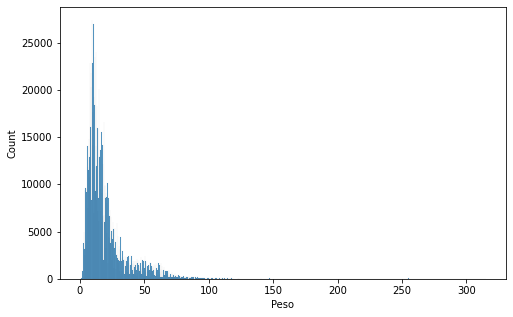

In [106]:
fig, axs = plt.subplots(figsize = (8, 5))
sns.histplot(x = 'peso', data=df[df['peso']<1000])
axs.set_xlabel('Peso')
#plt.savefig('images/peso_hist_zoom_300.png')
plt.show()
# distribución sesgada a la derecha

In [ ]:
fig, axs = plt.subplots(figsize = (8, 5))
sns.histplot(x = 'peso', data=df[df['peso']<100])
axs.set_xlabel('Peso')
#plt.savefig('images/peso_hist_zoom_100.png')
plt.show()

In [108]:
df[['peso']].describe(percentiles=[.0006, .01, .05, .10, .25, .5, .75, .90, .95, .99]) # max 315 
# VOLVER A HACER ESTO CON EL RANGO YA DEFINIDO

,peso
count,1.159403e+06
mean,2.031048e+01
std,1.829603e+01
min,0.000000e+00
0.06%,2.000000e+00
1%,3.400000e+00
5%,5.200000e+00
10%,6.800000e+00
25%,9.500000e+00
50%,1.460000e+01


In [109]:
df.drop([688190])[['peso']].describe() # 315 sigue siendo un montón - cuánto es aceptable ???

,peso
count,1.159402e+06
mean,2.031049e+01
std,1.829604e+01
min,0.000000e+00
25%,9.500000e+00
50%,1.460000e+01
75%,2.370000e+01
max,3.150000e+02


In [110]:
df[df['peso'] == 315] # este podría ser un error en donde va la coma - 3 kilos para un bebé de 15 días podría ser

,id_individuo,sexo,peso,talla,edad_dias
620535,160503,M,315.0,48.0,15.0


In [111]:
df[df['peso']==309.8] # lo mismo acá - 30 kilos sería un peso razonable para un chico de 8 años

,id_individuo,sexo,peso,talla,edad_dias
864712,223512,M,309.8,127.0,3025.0


In [112]:
df[df['peso']>300]

,id_individuo,sexo,peso,talla,edad_dias
55131,14393,F,303.9,123.0,3207.0
183390,47577,F,300.9,119.0,2765.0
620535,160503,M,315.0,48.0,15.0
635403,164314,F,302.4,137.0,3569.0
684483,176958,M,306.0,131.0,2287.0
772706,199715,F,301.8,131.0,3226.0
779447,201446,F,305.6,50.0,16.0
837645,216572,F,305.9,116.0,2199.0
864712,223512,M,309.8,127.0,3025.0
989048,255719,M,304.5,124.0,2765.0


#### Por rango etario

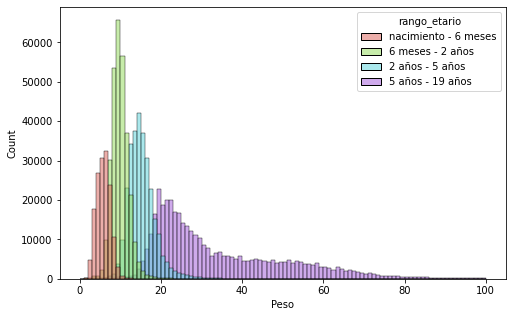

In [294]:
fig, axs = plt.subplots(figsize = (8, 5))
order = ['nacimiento - 6 meses', '6 meses - 2 años', '2 años - 5 años', '5 años - 19 años']
sns.histplot(x = 'peso', data=df_rangos[df_rangos['peso']<100], binwidth=1, hue='rango_etario',  hue_order = order, palette = sns.color_palette("hls",4), fill=True)
axs.set_xlabel('Peso')
#plt.savefig('images/peso_rango_5.png')
plt.show()
# esto está bueno porque podemos ver que se ordenan perfectamente por rango etario, de nacimiento a 6 meses se encuentran en los pesos menores, y así hasta los 5 años a 19 años que se encuentran los pesos mayores

In [114]:
'''fig, axs = plt.subplots(figsize = (8, 5))
order = ['nacimiento - 6 meses', '6 meses - 2 años', '2 años - 5 años', '5 años - 10 años', '10 años - 19 años', 'fuera de rango']
sns.histplot(x = 'peso', data=df_rangos[df_rangos['peso']<100], binwidth=1, hue='rango_etario',  hue_order = order, palette = sns.color_palette("hls",6), fill=True)
axs.set_xlabel('Peso')
#plt.savefig('images/peso_rango_6png')
plt.show()'''

'fig, axs = plt.subplots(figsize = (8, 5))\norder = [\'nacimiento - 6 meses\', \'6 meses - 2 años\', \'2 años - 5 años\', \'5 años - 10 años\', \'10 años - 19 años\', \'fuera de rango\']\nsns.histplot(x = \'peso\', data=df_rangos[df_rangos[\'peso\']<100], binwidth=1, hue=\'rango_etario\',  hue_order = order, palette = sns.color_palette("hls",6), fill=True)\naxs.set_xlabel(\'Peso\')\n#plt.savefig(\'images/peso_rango_6png\')\nplt.show()'

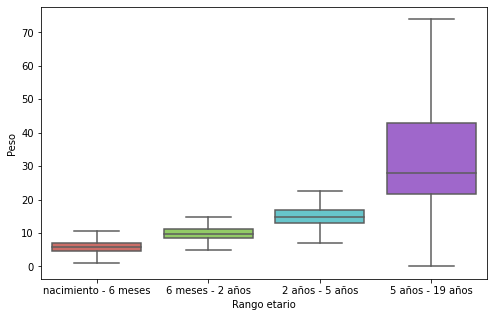

In [296]:
# boxplot
# ver de ordenar bien y agregar cositas lindas al gráfico - título, etc
fig, axs = plt.subplots(figsize = (8, 5))
order = ['nacimiento - 6 meses', '6 meses - 2 años', '2 años - 5 años', '5 años - 19 años']#, 'fuera de rango']
sns.boxplot(x='rango_etario', y='peso', data=df_rangos[(df_rangos['rango_etario']!='fuera de rango')&(df_rangos['peso']<74)], order=order, palette=sns.color_palette("hls",4), showfliers = False)
axs.set_ylabel('Peso')
axs.set_xlabel('Rango etario')
#plt.savefig('images/peso_boxplot_rango_etario_nac_a_19.png')
plt.show()

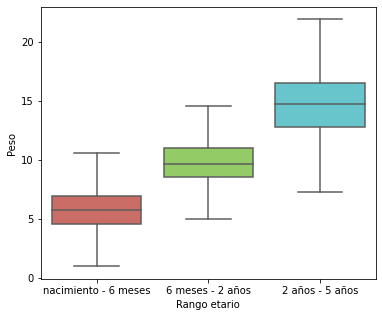

In [298]:
# boxplot
# ver de ordenar bien y agregar cositas lindas al gráfico - título, etc
fig, axs = plt.subplots(figsize = (6, 5))
order = ['nacimiento - 6 meses', '6 meses - 2 años', '2 años - 5 años']#, '5 años - 19 años', 'fuera de rango']
sns.boxplot(x='rango_etario', y='peso', data=df_rangos[((df_rangos['rango_etario']!='fuera de rango')&(df_rangos['rango_etario']!='5 años - 19 años'))&(df_rangos['peso']<22)], order=order, palette=sns.color_palette("hls",4), showfliers = False)
axs.set_ylabel('Peso')
axs.set_xlabel('Rango etario')
#plt.savefig('images/peso_boxplot_rango_etario_nac_a_5.png')
plt.show()

In [299]:
df_rangos.groupby('rango_etario')['peso'].describe(percentiles=[.01, .05, .10, .25, .5, .75, .90, .95, .99])
# VOLVER A HACER ESTO CON EL RANGO YA DEFINIDO

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
rango_etario,,,,,,,,,,,,,,
2 años - 5 años,293872.0,16.356336,26.398048,1.0,9.1,10.8,11.6,12.9,14.7,16.9,19.5,21.6,42.1,12597.9
5 años - 19 años,410541.0,34.970817,19.421473,0.0,14.3,17.2,18.6,21.7,28.4,44.6,59.7,67.6,89.6,309.8
6 meses - 2 años,299035.0,10.583345,8.102997,0.0,5.8,7.1,7.6,8.6,9.7,11.1,12.4,13.5,20.9,264.6
nacimiento - 6 meses,152265.0,6.200462,6.159000,0.4,2.8,3.1,3.8,4.6,5.9,7.0,8.0,8.6,10.6,315.0


#### Por sexo

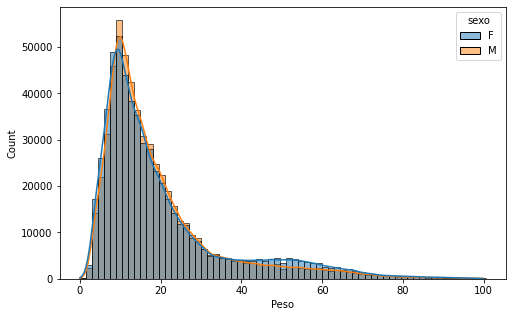

In [118]:
# distribución
fig, axs = plt.subplots(figsize = (8, 5))
sns.histplot(x = 'peso', data=df[df['peso']<100], binwidth=1.5, hue='sexo', fill=True, kde=True)
axs.set_xlabel('Peso')
#plt.savefig('images/peso_hist_sexo.png')
plt.show()
# la distribución es prácticamente idéntica para ambos sexos
# teniendo una distribución sesgada a la derecha

In [119]:
df.groupby('sexo')['peso'].describe() # los estadísticos reflajan lo dicho anteriormente. 
# identificamos también un valor atípico, el máximo para F es de 12597
# VOLVER A HACER ESTO CON EL RANGO YA DEFINIDO

,count,mean,std,min,25%,50%,75%,max
sexo,,,,,,,,
F,585679.0,20.829853,18.902728,0.0,9.4,14.6,24.5,305.9
M,573724.0,19.780289,17.639454,0.0,9.7,14.5,22.8,315.0


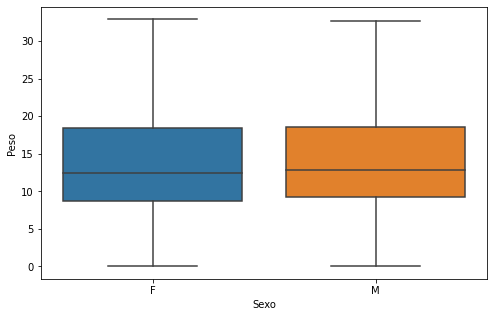

In [134]:
# boxplot
fig, axs = plt.subplots(figsize = (8, 5))
sns.boxplot(x='sexo', y='peso', data=df[df['peso']<33], showfliers = False)
axs.set_ylabel('Peso')
axs.set_xlabel('Sexo')
#plt.savefig('images/peso_boxplot_sexo.png')
plt.show()

### Talla

In [ ]:
fig, axs = plt.subplots(figsize = (8, 5))
sns.histplot(x = 'talla', binwidth=2, data=df)
axs.set_xlabel('Talla')
#plt.savefig('images/talla_hist.png')
plt.show()

In [300]:
df[['talla']].describe(percentiles=[.01, .05, .10, .25, .5, .75, .90, .95, .99])
# VOLVER A HACER ESTO CON EL RANGO YA DEFINIDO

,talla
count,1.155713e+06
mean,9.824268e+01
std,3.064606e+01
min,1.900000e+01
1%,4.900000e+01
5%,5.600000e+01
10%,6.200000e+01
25%,7.300000e+01
50%,9.400000e+01
75%,1.190000e+02


In [ ]:
df[df['talla'] == 251] # este valor no tiene sentido para la edad 

#### Por rango etario

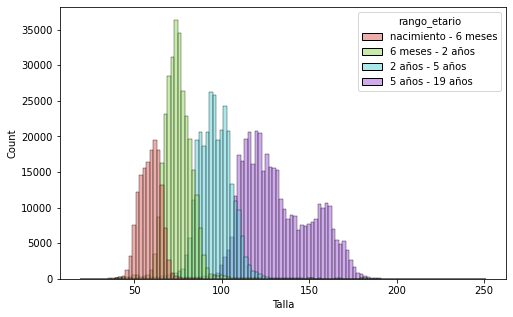

In [303]:
fig, axs = plt.subplots(figsize = (8, 5))
order = ['nacimiento - 6 meses', '6 meses - 2 años', '2 años - 5 años', '5 años - 19 años']#, 'fuera de rango']
sns.histplot(x = 'talla', data=df_rangos, binwidth=2, hue='rango_etario',  hue_order = order, palette = sns.color_palette("hls",4), fill=True)
axs.set_xlabel('Talla')
#plt.savefig('images/talla_rango_5.png')
plt.show()

In [310]:
df_rangos_extra['rango_etario'].value_counts(normalize=True)

6 meses - 2 años        0.258745
2 años - 5 años         0.254278
5 años - 19 años        0.240015
nacimiento - 6 meses    0.131750
10 años - 19 años       0.115213
Name: rango_etario, dtype: float64

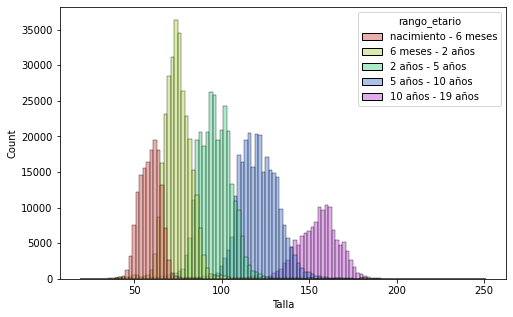

In [314]:
# 5 a 19 años subdividido
df_rangos_extra = df.copy()
df_rangos_extra['rango_etario'] = df_rangos_extra['edad_dias'].apply(lambda x: defino_rango_extra(x))


fig, axs = plt.subplots(figsize = (8, 5))
order = ['nacimiento - 6 meses', '6 meses - 2 años', '2 años - 5 años', '5 años - 10 años', '10 años - 19 años']#, 'fuera de rango']
sns.histplot(x = 'talla', data=df_rangos_extra, binwidth=2, hue='rango_etario',  hue_order = order, palette = sns.color_palette("hls",5), fill=True)
axs.set_xlabel('Talla')
#plt.savefig('images/talla_rango_6.png')
plt.show()

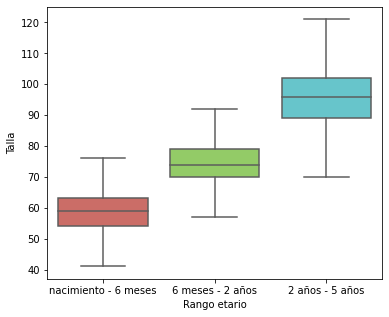

In [316]:
fig, axs = plt.subplots(figsize = (6, 5))
order = ['nacimiento - 6 meses', '6 meses - 2 años', '2 años - 5 años']#, '5 años - 19 años', 'fuera de rango']
sns.boxplot(x='rango_etario', y='talla', data=df_rangos[((df_rangos['rango_etario']!='fuera de rango')&(df_rangos['rango_etario']!='5 años - 19 años')) & (df_rangos['talla']<200)], order=order, palette=sns.color_palette("hls",4), showfliers = False)
axs.set_ylabel('Talla')
axs.set_xlabel('Rango etario')
#plt.savefig('images/talla_boxplot_rango_etario_nac_a_5.png')
plt.show()

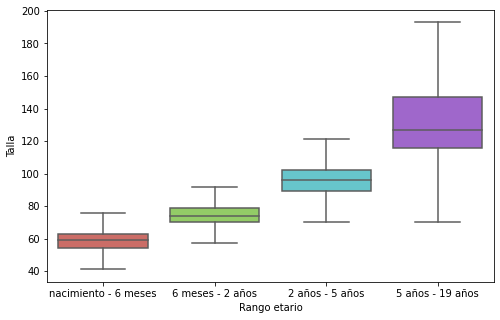

In [317]:
fig, axs = plt.subplots(figsize = (8, 5))
order = ['nacimiento - 6 meses', '6 meses - 2 años', '2 años - 5 años', '5 años - 19 años']#, 'fuera de rango']
sns.boxplot(x='rango_etario', y='talla', data=df_rangos[(df_rangos['rango_etario']!='fuera de rango') & (df_rangos['talla']<200)], order=order, palette=sns.color_palette("hls",4), showfliers = False)
axs.set_ylabel('Talla')
axs.set_xlabel('Rango etario')
#plt.savefig('images/talla_boxplot_rango_etario_nac_a_19.png')
plt.show()

In [318]:
df_rangos.groupby('rango_etario')['talla'].describe(percentiles=[.01, .05, .10, .25, .5, .75, .90, .95, .99])
# VOLVER A HACER ESTO CON EL RANGO YA DEFINIDO

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
rango_etario,,,,,,,,,,,,,,
2 años - 5 años,293872.0,95.873765,10.518664,19.0,69.0,82.0,85.0,89.0,96.0,102.0,108.0,111.0,121.0,232.0
5 años - 19 años,410541.0,131.626848,20.063998,19.0,95.0,107.0,109.0,116.0,127.0,147.0,161.0,167.0,175.0,247.0
6 meses - 2 años,299035.0,74.838939,8.342664,19.0,56.0,64.0,66.0,70.0,74.0,79.0,84.0,87.0,96.0,251.0
nacimiento - 6 meses,152265.0,58.766263,6.558171,19.0,46.0,49.0,51.0,54.0,59.0,63.0,66.0,67.0,72.0,181.0


#### Por sexo

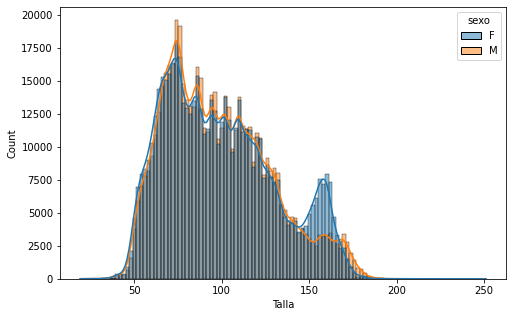

In [172]:
# distribución
fig, axs = plt.subplots(figsize = (8, 5))
sns.histplot(x = 'talla', data=df, binwidth=2, hue='sexo', fill=True, kde=True)
axs.set_xlabel('Talla')
#plt.savefig('images/talla_hist_sexo.png')
plt.show()
# vemos que la ditribución para ambos sexos se comporta de forma similar, con una diferencia al rededor de los 160 cm

In [ ]:
df.groupby('sexo')['talla'].describe() # los estadísticos reflejan lo mismo
# VOLVER A HACER ESTO CON EL RANGO YA DEFINIDO

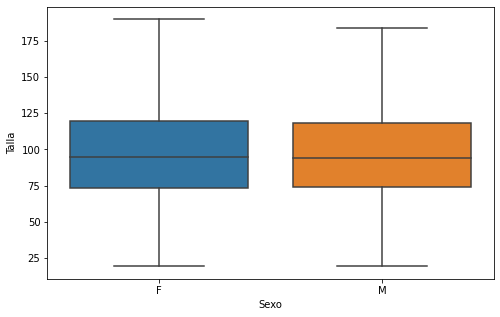

In [176]:
# boxplot
fig, axs = plt.subplots(figsize = (8, 5))
sns.boxplot(x='sexo', y='talla', data=df[df['talla']<200], showfliers = False)
axs.set_ylabel('Talla')
axs.set_xlabel('Sexo')
#plt.savefig('images/talla_boxplot_sexo.png')
plt.show()

# Z-scores
- **HAZ:** talla para la edad
- **WAZ:** peso para la edad
- **BMIZ:** índice de masa corporal para la edad

In [1580]:
# The "include_cdc" option will enable CDC measurements for children >5 years.

calculator = Calculator(adjust_height_data=False, adjust_weight_scores=False,
                       include_cdc=True, logger_name='pygrowup',
                       log_level='INFO')

In [1581]:
# Utiliza edad en meses
df['edad_meses'] = round(df['edad_dias']/30.5,1) # a cuanto redondeamos ???

In [1582]:
# Elimino los que tienen peso = 0
df = df[df['peso']>0]

In [1583]:
df.shape[0]

1159397

In [1584]:
df['id_individuo'].nunique()

299985

In [1585]:
((shape_original - df.shape[0]) *100) / shape_original

0.1729799914930696

In [1586]:
# Calculo la masa corporal - TIENE QUE ESTAR EN KG/M2
df['masa_corporal'] = round(df['peso'] / ((df['talla']/100)**2),2) 

In [1587]:
df['masa_corporal'].describe()

count    1.159397e+06
mean     1.878048e+01
std      1.930422e+01
min      1.700000e-01
25%      1.562000e+01
50%      1.694000e+01
75%      1.891000e+01
max      3.230000e+03
Name: masa_corporal, dtype: float64

In [1588]:
df['masa_corporal'].min()

0.17

In [1589]:
df['masa_corporal'].max()

3230.0

In [1590]:
df[(df['masa_corporal']>30)].shape[0]

24245

In [1591]:
df.shape[0]

1159397

In [1592]:
(24245 * 100) / 1159397

2.0911732564427887

In [1593]:
8/(0.41**2)

47.59071980963713

In [1594]:
df[df['masa_corporal']>50]

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal
95,25,M,208.1,114.0,2121.0,69.5,160.13
224,60,M,106.7,127.0,1087.0,35.6,66.15
654,173,F,199.9,99.0,1159.0,38.0,203.96
703,187,F,36.3,63.0,3560.0,116.7,91.46
763,206,M,8.5,41.0,197.0,6.5,50.57
...,...,...,...,...,...,...,...
1159818,299903,F,132.6,87.0,619.0,20.3,175.19
1159848,299909,M,104.0,75.0,364.0,11.9,184.89
1160089,299975,M,33.6,70.0,2733.0,89.6,68.57
1160124,299984,M,65.0,62.0,127.0,4.2,169.09


In [1595]:
(9274 * 100) / 1161406

0.7985149034876693

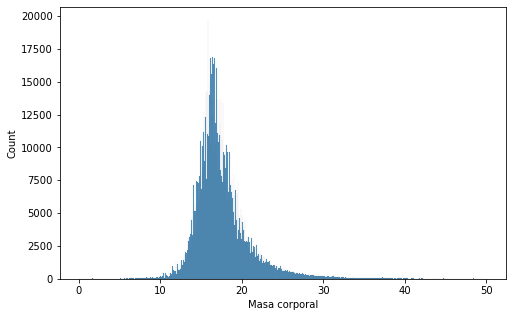

In [1596]:
fig, axs = plt.subplots(figsize = (8, 5))
sns.histplot(x = 'masa_corporal', data=df[df['masa_corporal']<50])
axs.set_xlabel('Masa corporal')
#plt.savefig('images/hist_masa_corporal.png')
plt.show()

#### HAZ

In [1597]:
# ejemplo - debería estar entre -2 y -3 
calculator.lhfa(measurement=df.loc[30]['talla'], age_in_months=str(df.loc[30]['edad_meses']), sex=df.loc[30]['sexo'])

Decimal('-2.54')

In [1598]:
df.loc[30]

id_individuo         9
sexo                 F
peso               8.1
talla             64.0
edad_dias        292.0
edad_meses         9.6
masa_corporal    19.78
Name: 30, dtype: object

In [1599]:
df_haz = df.dropna(subset=['sexo', 'edad_meses', 'talla'])

In [1600]:
def get_haz(talla, edad_meses, sexo):
    haz = calculator.lhfa(measurement=talla, age_in_months=edad_meses, sex=sexo)
    return haz

In [1601]:
df_haz['haz'] = df_haz.apply(lambda d: float(get_haz(d['talla'], d['edad_meses'], d['sexo'])), axis =1)

In [1602]:
df_haz.head()

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz
0,1,F,18.6,104.0,1964.0,64.4,17.20,-1.33
1,1,F,23.5,115.0,2615.0,85.7,17.77,-1.36
2,2,M,7.8,59.0,168.0,5.5,22.41,-3.27
3,2,M,7.8,66.0,193.0,6.3,17.91,-0.76
4,3,F,34.6,141.0,3573.0,117.1,17.40,0.61


In [1603]:
df_haz.shape[0]

1159397

In [1604]:
df.shape[0]

1159397

In [1605]:
# finalmente voy a querer hacer un join con el df original
df_final = df.merge(df_haz, on=['id_individuo', 'sexo', 'peso', 'talla', 'edad_dias', 'edad_meses', 'masa_corporal'], how='left')
df_final.head()

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz
0,1,F,18.6,104.0,1964.0,64.4,17.20,-1.33
1,1,F,23.5,115.0,2615.0,85.7,17.77,-1.36
2,2,M,7.8,59.0,168.0,5.5,22.41,-3.27
3,2,M,7.8,66.0,193.0,6.3,17.91,-0.76
4,3,F,34.6,141.0,3573.0,117.1,17.40,0.61


In [1606]:
df_final.shape[0]

1159397

#### WAZ

In [1607]:
# ejemplo 
calculator.wfa(measurement=df.loc[30]['peso'], age_in_months=str(df.loc[30]['edad_meses']), sex=df.loc[30]['sexo'])

Decimal('-0.13')

In [1608]:
df_waz = df.dropna(subset=['sexo', 'edad_meses', 'peso'])
df_waz = df_waz[df_waz['peso']>0] # tiene que ser mayor a 0 para que pueda hacer el cálculo

In [1609]:
def get_waz(peso, edad_meses, sexo):
    waz = calculator.wfa(measurement=peso, age_in_months=edad_meses, sex=sexo)
    return waz

In [1610]:
df_waz['waz'] = df_waz.apply(lambda d: float(get_waz(d['peso'], d['edad_meses'], d['sexo'])), axis =1)

In [1611]:
df_waz.head()

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,waz
0,1,F,18.6,104.0,1964.0,64.4,17.20,-0.07
1,1,F,23.5,115.0,2615.0,85.7,17.77,0.11
2,2,M,7.8,59.0,168.0,5.5,22.41,0.34
3,2,M,7.8,66.0,193.0,6.3,17.91,-0.16
4,3,F,34.6,141.0,3573.0,117.1,17.40,0.38


In [1612]:
df_waz.shape[0]

1159397

In [1613]:
df.shape[0]

1159397

In [1614]:
# finalmente voy a querer hacer un join con el df original
df_final = df_final.merge(df_waz, on=['id_individuo', 'sexo', 'peso', 'talla', 'edad_dias', 'edad_meses', 'masa_corporal'], how='left')
df_final.head()

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz
0,1,F,18.6,104.0,1964.0,64.4,17.20,-1.33,-0.07
1,1,F,23.5,115.0,2615.0,85.7,17.77,-1.36,0.11
2,2,M,7.8,59.0,168.0,5.5,22.41,-3.27,0.34
3,2,M,7.8,66.0,193.0,6.3,17.91,-0.76,-0.16
4,3,F,34.6,141.0,3573.0,117.1,17.40,0.61,0.38


In [1615]:
df_final.shape[0]

1159397

#### BMIZ

In [1616]:
# ejemplo 
float(calculator.bmifa(measurement=df.loc[30]['masa_corporal'], age_in_months=str(df.loc[30]['edad_meses']), sex=df.loc[30]['sexo']))

1.83

In [1617]:
df_bmiz = df.dropna(subset=['sexo', 'edad_meses', 'masa_corporal'])
df_bmiz = df_bmiz[df_bmiz['masa_corporal']>0] # tiene que ser mayor a 0 para que pueda hacer el cálculo

In [1618]:
def get_bmiz(masa_corporal, edad_meses, sexo):
    bmiz = calculator.bmifa(measurement=masa_corporal, age_in_months=edad_meses, sex=sexo)
    return bmiz

In [1619]:
df_bmiz['bmiz'] = df_bmiz.apply(lambda d: float(get_bmiz(d['masa_corporal'], d['edad_meses'], d['sexo'])), axis =1)

In [1620]:
df_bmiz.head()

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,bmiz
0,1,F,18.6,104.0,1964.0,64.4,17.20,1.19
1,1,F,23.5,115.0,2615.0,85.7,17.77,1.07
2,2,M,7.8,59.0,168.0,5.5,22.41,3.07
3,2,M,7.8,66.0,193.0,6.3,17.91,0.39
4,3,F,34.6,141.0,3573.0,117.1,17.40,0.28


In [1621]:
df_bmiz.shape[0]

1159397

In [1622]:
df.shape[0]

1159397

In [1623]:
# finalmente voy a querer hacer un join con el df original
df_final = df_final.merge(df_bmiz, on=['id_individuo', 'sexo', 'peso', 'talla', 'edad_dias', 'edad_meses', 'masa_corporal'], how='left')
df_final.head()

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz,bmiz
0,1,F,18.6,104.0,1964.0,64.4,17.20,-1.33,-0.07,1.19
1,1,F,23.5,115.0,2615.0,85.7,17.77,-1.36,0.11,1.07
2,2,M,7.8,59.0,168.0,5.5,22.41,-3.27,0.34,3.07
3,2,M,7.8,66.0,193.0,6.3,17.91,-0.76,-0.16,0.39
4,3,F,34.6,141.0,3573.0,117.1,17.40,0.61,0.38,0.28


In [1624]:
df_final.shape[0]

1159397

In [1112]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159781 entries, 0 to 1159780
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id_individuo   1159781 non-null  int64  
 1   sexo           1159781 non-null  object 
 2   peso           1159781 non-null  float64
 3   talla          1159781 non-null  float64
 4   edad_dias      1159781 non-null  float64
 5   edad_meses     1159781 non-null  float64
 6   masa_corporal  1159781 non-null  float64
 7   haz            1159781 non-null  float64
 8   waz            1159781 non-null  float64
 9   bmiz           1159781 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 97.3+ MB


In [1156]:
df_final.sample(5, random_state=15).head(5)

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz,bmiz
1076679,278547,M,11.3,82.0,612.0,20.1,16.81,-0.78,-0.04,0.64
357129,92462,M,64.3,171.0,4838.0,158.6,21.99,1.67,1.47,1.04
1032763,267185,F,9.5,72.0,366.0,12.0,18.33,-0.78,0.48,1.27
391808,101488,M,24.3,117.0,2314.0,75.9,17.75,-0.05,0.85,1.33
1133283,293132,F,30.9,133.0,2956.0,96.9,17.47,0.86,0.96,0.74


In [1157]:
# extraer imagen
df_sample = df_final.sample(5, random_state=15).head(5).reset_index(drop=True)
dfi.export(df_sample, 'images/data_zscores_5.png')

In [1625]:
# guardarlo
#df_final.to_csv('data/df_zscores.csv', index=False)

## Análisis Z-scores

In [4]:
df_final = pd.read_csv('df_zscores.csv')

In [5]:
df_final.shape[0]

1159397

In [6]:
# df_final = df_final[df_final['masa_corporal']<50] # estos los borramos por qué ???

In [7]:
df_final.head(1)

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz,bmiz
0,1,F,18.6,104.0,1964.0,64.4,17.2,-1.33,-0.07,1.19


In [5]:
df_final['rango_etario'] = df_final['edad_dias'].apply(lambda x: defino_rango(x))

# no quiero los de fuera de rango
df_final = df_final[df_final['rango_etario']!='fuera de rango']

In [6]:
df_plau = df_final[((df_final['haz']<=6) & (df_final['haz']>=(-6))) &
                      ((df_final['waz']<=5) & (df_final['waz']>=(-6))) &
                      ((df_final['bmiz']<=5) & (df_final['bmiz']>=(-5)))] # esto pide que los tres estén en rango

df_no_plau = df_final[((df_final['haz']>6) | (df_final['haz']<(-6))) |
                      ((df_final['waz']>5) | (df_final['waz']<(-6))) |
                      ((df_final['bmiz']>5) | (df_final['bmiz']<(-5)))] # esto me devuelve los que tienen mal en alguna de las tres

#### BMIZ

In [13]:
df_plau.describe()['bmiz']

count    1.118600e+06
mean     5.160990e-01
std      1.253523e+00
min     -5.000000e+00
25%     -1.900000e-01
50%      5.100000e-01
75%      1.280000e+00
max      5.000000e+00
Name: bmiz, dtype: float64

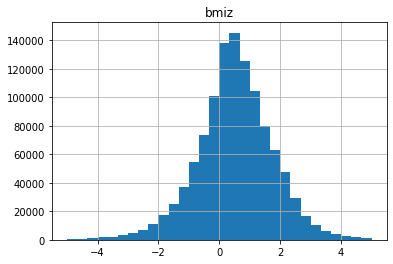

In [14]:
bmiz_fig = df_plau.hist('bmiz', bins=30)
#plt.savefig('images/bmiz.png')

### HAZ

In [15]:
df_plau['haz'].describe()

count    1.118600e+06
mean    -3.079551e-01
std      1.348068e+00
min     -6.000000e+00
25%     -1.080000e+00
50%     -3.200000e-01
75%      4.900000e-01
max      6.000000e+00
Name: haz, dtype: float64

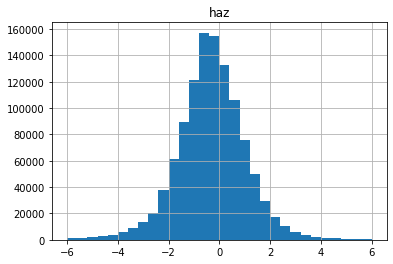

In [16]:
haz_fig = df_plau.hist('haz', bins = 30)
#plt.savefig('images/haz.png')

### WAZ

In [17]:
df_plau['waz'].describe()

count    1.118600e+06
mean     1.320755e-01
std      1.213139e+00
min     -6.000000e+00
25%     -5.900000e-01
50%      1.100000e-01
75%      8.900000e-01
max      5.000000e+00
Name: waz, dtype: float64

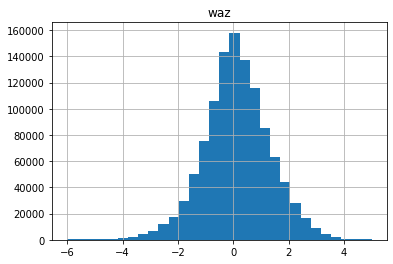

In [18]:
waz_fig = df_plau.hist('waz', bins = 30)
#plt.savefig('images/waz.png')

### Registros no plausibles

In [19]:
df_no_plau.shape[0]

36508

#### Sexo

In [20]:
df_no_plau['id_individuo'].nunique() # cantidad de individuos - corresponde con la suma de lo anterior

30430

In [21]:
no_plau_sexo = df_no_plau.groupby(['sexo']).nunique()['id_individuo'].reset_index()
no_plau_sexo['per'] = no_plau_sexo['id_individuo'].apply(lambda x: round(x/ no_plau_sexo['id_individuo'].sum()*100, 2))
no_plau_sexo

,sexo,id_individuo,per
0,F,14368,47.22
1,M,16062,52.78


In [ ]:
df_no_plau['sexo'].value_counts()#(normalize=True)*100 # es prácticamente el mismo porcentaje agrupando o no, pero qué es lo correcto ???

In [23]:
df_final['sexo'].value_counts(normalize=True)*100

F    50.400309
M    49.599691
Name: sexo, dtype: float64

In [24]:
df_no_plau['sexo'].value_counts()/df_final['sexo'].value_counts()

F    0.029450
M    0.033796
Name: sexo, dtype: float64

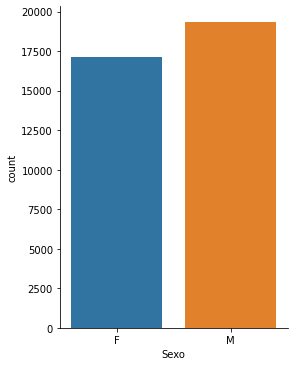

In [25]:
#data = df_no_plau.groupby(['id_individuo', 'sexo']).count()['peso'].reset_index() # Esto no se si esta bien, capaz en realidad no hay que agrupar por individuo
g = sns.catplot(x="sexo", kind="count", data=df_no_plau, height=5, aspect=4/5)
g.set_xlabels('Sexo')
#plt.savefig('images/errores_sexo.png')
plt.show()

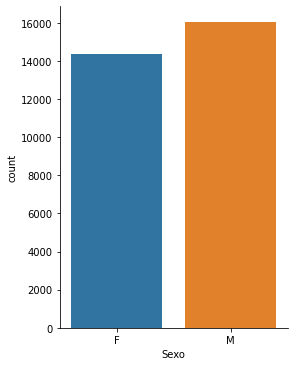

In [26]:
data = df_no_plau.groupby(['id_individuo', 'sexo']).count()['peso'].reset_index() # Esto no se si esta bien, capaz en realidad no hay que agrupar por individuo
g = sns.catplot(x="sexo", kind="count", data=data, height=5, aspect=4/5)
g.set_xlabels('Sexo')
#plt.savefig('images/errores_sexo.png')
plt.show()

#### Rango etario

In [27]:
df_no_plau[df_no_plau['id_individuo'] == 37] # puede tener errores en más de un rango etario

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz,bmiz,rango_etario
145,37,F,3.2,49.0,160.0,5.2,13.33,-6.78,-6.36,-2.59,nacimiento - 6 meses
149,37,F,17.1,78.0,414.0,13.6,28.11,1.06,4.75,5.63,6 meses - 2 años
150,37,F,15.2,115.0,622.0,20.4,11.49,10.72,2.75,-3.85,6 meses - 2 años


In [28]:
df_no_plau.groupby(['id_individuo', 'rango_etario']).ngroups # cantidad de combinaciones únicas id_individup-rango_etario

32547

In [29]:
no_plau_rangos = df_no_plau.groupby(['rango_etario']).nunique()['id_individuo'].reset_index()
no_plau_rangos['per'] = no_plau_rangos['id_individuo'].apply(lambda x: round(x/ no_plau_rangos['id_individuo'].sum()*100, 2))
no_plau_rangos
# Está bien que sume más que la cantidad de individuos ya que como vimos en el caso anterior, un individuo puede tener errores en distintos rangos de edad

,rango_etario,id_individuo,per
0,2 años - 5 años,10805,33.20
1,5 años - 19 años,7520,23.11
2,6 meses - 2 años,10625,32.65
3,nacimiento - 6 meses,3597,11.05


In [30]:
df_no_plau['rango_etario'].value_counts(normalize=True)*100 # es prácticamente el mismo porcentaje agrupando o no, pero qué es lo correcto ???

2 años - 5 años         33.376246
6 meses - 2 años        32.902378
5 años - 19 años        22.940177
nacimiento - 6 meses    10.781199
Name: rango_etario, dtype: float64

In [31]:
# veamos los porcentajes de rangos en el df original
df_final['edad_dias'].apply(lambda x: defino_rango(x)).value_counts(normalize=True)*100

5 años - 19 años        35.557022
6 meses - 2 años        25.854812
2 años - 5 años         25.420913
nacimiento - 6 meses    13.167254
Name: edad_dias, dtype: float64

In [32]:
df_no_plau['rango_etario'].value_counts()/df_final['edad_dias'].apply(lambda x: defino_rango(x)).value_counts()

2 años - 5 años         0.041497
5 años - 19 años        0.020391
6 meses - 2 años        0.040221
nacimiento - 6 meses    0.025878
dtype: float64

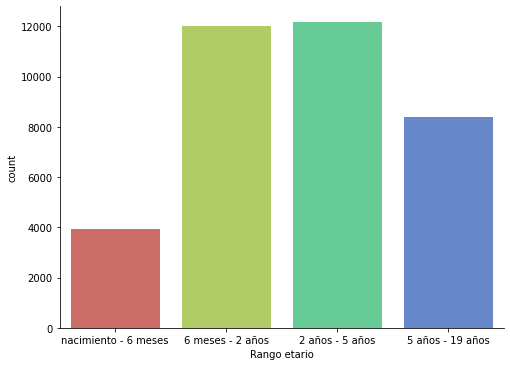

In [33]:
order = ['nacimiento - 6 meses', '6 meses - 2 años', '2 años - 5 años', '5 años - 19 años']
g = sns.catplot(x="rango_etario", kind="count", data=df_no_plau, height=5, aspect=7/5, order=order, palette=sns.color_palette("hls",5))
g.set_xlabels('Rango etario')
#plt.savefig('images/errores_rango.png')
plt.show()

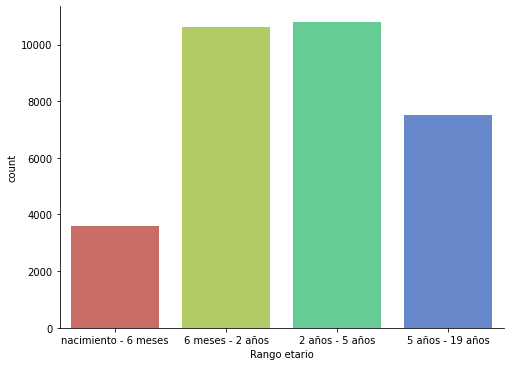

In [34]:
data = df_no_plau.groupby(['rango_etario', 'id_individuo']).count()['peso'].reset_index()
order = ['nacimiento - 6 meses', '6 meses - 2 años', '2 años - 5 años', '5 años - 19 años']
g = sns.catplot(x="rango_etario", kind="count", data=data, height=5, aspect=7/5, order=order, palette=sns.color_palette("hls",5))
g.set_xlabels('Rango etario')
#plt.savefig('images/errores_rango.png')
plt.show()

In [35]:
df_no_plau.groupby(['sexo', 'rango_etario']).nunique()['id_individuo'].reset_index()

,sexo,rango_etario,id_individuo
0,F,2 años - 5 años,4993
1,F,5 años - 19 años,3716
2,F,6 meses - 2 años,4986
3,F,nacimiento - 6 meses,1655
4,M,2 años - 5 años,5812
5,M,5 años - 19 años,3804
6,M,6 meses - 2 años,5639
7,M,nacimiento - 6 meses,1942


In [36]:
# no se si sirve esto porque porque un mismo individuo puede figurar en distintos rangos de edad
# pero en F/M una sola vez entonces la suma de los casos queda medio extraña, capaz conviene mostrarlo en distintas tablas
pd.pivot(df_no_plau.groupby(['sexo', 'rango_etario']).nunique()['id_individuo'].reset_index(), index='rango_etario', columns='sexo', values='id_individuo')

sexo,F,M
rango_etario,,
2 años - 5 años,4993,5812
5 años - 19 años,3716,3804
6 meses - 2 años,4986,5639
nacimiento - 6 meses,1655,1942


### Registros plausibles

#### Problemas en la serie de mediciones de Talla

In [37]:
df_plau[df_plau['id_individuo']==6].sort_values('edad_dias')['talla'].tolist()

[97.0, 100.0, 96.0, 98.0]

In [38]:
# lista de individuos
individuos = df_plau['id_individuo'].unique().tolist()

individuos_error = []
diferencias = []

# habría que ver cuántos cm consideramos en estos casos, ya que la diferencia podría ser por distintos elementos de medición
for i in individuos:
    
    # me quedo con el pedazo de df que corresponde al individuo
    # lo ordeno por edad y me quedo con los valores de la talla
    tallas = df_plau[df_plau['id_individuo']==i].sort_values('edad_dias')['talla'].tolist()
    
    talla = 0
    j = 0
    while j < len(tallas):
        
        if tallas[j] < talla - 1: # en este caso considero que puede haber un error de 1 cm
            #print(i)
            individuos_error.append(i)
            diferencias.append(talla-tallas[j])
            break
            
        else:
            talla = tallas[j]
        
        j = j+1

KeyboardInterrupt: 

In [ ]:
len(individuos_con) # 55715
#individuos_con = individuos_error
# si descarto los de error 1 cm
len(individuos_error)

In [57]:
from collections import Counter
diferencias.sort()
Counter(diferencias)

Counter({1.0: 11962,
         2.0: 8134,
         3.0: 6110,
         4.0: 4727,
         5.0: 4273,
         6.0: 3586,
         7.0: 2707,
         8.0: 2343,
         9.0: 1768,
         10.0: 1872,
         11.0: 1241,
         12.0: 1076,
         13.0: 877,
         14.0: 698,
         15.0: 762,
         16.0: 530,
         17.0: 449,
         18.0: 393,
         19.0: 265,
         20.0: 319,
         21.0: 233,
         22.0: 187,
         23.0: 148,
         24.0: 141,
         25.0: 152,
         26.0: 111,
         27.0: 91,
         28.0: 86,
         29.0: 59,
         30.0: 76,
         31.0: 47,
         32.0: 38,
         33.0: 30,
         34.0: 29,
         35.0: 36,
         36.0: 27,
         37.0: 18,
         38.0: 12,
         39.0: 13,
         40.0: 12,
         41.0: 12,
         42.0: 13,
         43.0: 6,
         44.0: 11,
         45.0: 10,
         46.0: 4,
         47.0: 6,
         48.0: 4,
         49.0: 1,
         50.0: 3,
         51.0: 2,
        

#### Peso

In [10]:
# lista de individuos
individuos = df_plau['id_individuo'].unique().tolist()

individuos_error_peso = []
diferencias = []

for i in individuos:
    
    # me quedo con el pedazo de df que corresponde al individuo
    # lo ordeno por edad y me quedo con los valores de la talla
    pesos = df_plau[df_plau['id_individuo']==i].sort_values('edad_dias')['peso'].tolist()
    
    
    j = 0
    while j < len(pesos)-1:
        
        if pesos[j+1] < pesos[j]:
            individuos_error_peso.append(i)
            diferencias.append(pesos[j]-pesos[j+1])
    
        j = j+1

In [ ]:
df_plau[df_plau['id_individuo'].isin(individuos_error_peso)].nunique()

In [11]:
# Acá le voy a pasar los que baja el peso
df_no_plau_peso = df_plau[df_plau['id_individuo'].isin(individuos_error_peso)]

dic_deltas = {}

# habría que ver cuántos cm consideramos en estos casos, ya que la diferencia podría ser por distintos elementos de medición
for rango in df_no_plau_peso['rango_etario'].unique().tolist():
    
    dif_pesos = []
    dif_meses = []
    
    for i in df_no_plau_peso[df_no_plau_peso['rango_etario']==rango]['id_individuo'].unique().tolist():
    
        # me quedo con el pedazo de df que corresponde al individuo
        # lo ordeno por edad y me quedo con los valores de la talla y la edad en meses
        pesos = df_no_plau_peso[(df_no_plau_peso['rango_etario']==rango)&(df_no_plau_peso['id_individuo']==i)].sort_values('edad_dias')['peso'].tolist()
        meses = df_no_plau_peso[(df_no_plau_peso['rango_etario']==rango)&(df_no_plau_peso['id_individuo']==i)].sort_values('edad_dias')['edad_meses'].tolist()
    
        j = 0
        while j < len(pesos)-1:
            
            if(pesos[j+1] < pesos[j]):#aca evaluo si en la siguiente fecha el peso es <
                dif_pesos.append(pesos[j]-pesos[j+1])
                dif_meses.append(meses[j+1]-meses[j])        
                j = j+1
            
    dic_deltas[rango] = [dif_pesos, dif_meses]
    print(f'Terminó rango {rango}')

KeyboardInterrupt: 

In [ ]:
# Acá le voy a pasar los que no baja el peso
df_plau_peso = df_plau[~df_plau['id_individuo'].isin(individuos_error_peso)]

dic_deltas = {}

# habría que ver cuántos cm consideramos en estos casos, ya que la diferencia podría ser por distintos elementos de medición
for rango in df_plau['rango_etario'].unique().tolist():
    
    dif_pesos = []
    dif_meses = []
    
    for i in df_plau[df_plau['rango_etario']==rango]['id_individuo'].unique().tolist():
    
        # me quedo con el pedazo de df que corresponde al individuo
        # lo ordeno por edad y me quedo con los valores de la talla y la edad en meses
        pesos = df_plau[(df_plau['rango_etario']==rango)&(df_plau['id_individuo']==i)].sort_values('edad_dias')['peso'].tolist()
        meses = df_plau[(df_plau['rango_etario']==rango)&(df_plau['id_individuo']==i)].sort_values('edad_dias')['edad_meses'].tolist()
    
        j = 0
        while j < len(pesos)-1:
            
            dif_pesos.append(pesos[j+1]-pesos[j])
            dif_meses.append(meses[j+1]-meses[j])        
            j = j+1
            
    dic_deltas[rango] = [dif_pesos, dif_meses]
    print(f'Terminó rango {rango}')

In [1]:
dic_deltas['5 años - 19 años'][0]

NameError: name 'dic_deltas' is not defined

<AxesSubplot:>

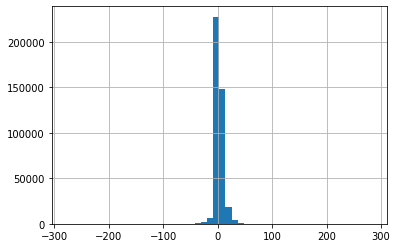

In [26]:
pd.Series(dic_deltas['5 años - 19 años'][0]).hist(bins=50)

<AxesSubplot:>

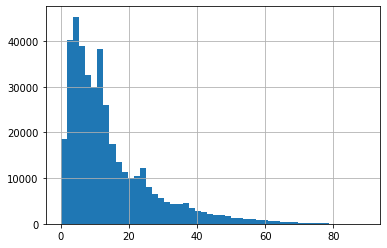

In [27]:
pd.Series(dic_deltas['5 años - 19 años'][1]).hist(bins=50)

<AxesSubplot:>

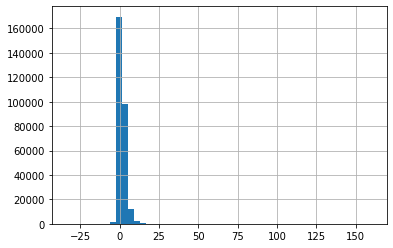

In [28]:
pd.Series(dic_deltas['nacimiento - 6 meses'][0]).hist(bins=50)

<AxesSubplot:>

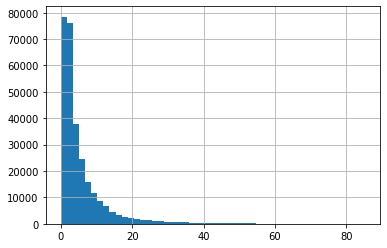

In [29]:
pd.Series(dic_deltas['nacimiento - 6 meses'][1]).hist(bins=50)

In [ ]:
# definir para la talla cuánto puede bajar la medición 
# tambieén se puede definir cuánto es lógico que aumente
# lo mismo para el peso 
# repetir el mismo análisis anterior (para los no plausibles) pero para estos casos
# definir estas reglas con las que identificamos los casos, para que la serie de mediciones sea consistente
# proponer mecanismo de remediacion automática para estos casos 

In [ ]:
# PESO
    # 1er mes:  # 907 gramos en peso. 
                # Lo normal es una ganancia de peso de alrededor de 150-250 gramos a la semana durante el primer mes de vida o 20 gramos al día.
    # 1 a 3 meses: aumento de 680 a 900 gramos por mes
    
    # Quiero saber cuánto es aceptable que baje de peso ???


# TALLA
    # 1er mes: de 2,5 a 3,8 cm
    # 1 a 3 meses: 2.50 cm por mes
    # 1er año: durante el primero año el niño crece unos 25 centímetros. Se estima un aumento de talla promedio de dos centímetros al mes
    # 2do año: crecerá unos 12,5 centímetros.
    # entre los dos y tres años se estima que aumente una media de 8 centímetros, entre los tres y los cuatro, 7 centímetros, entre los cuatro y los cinco, 6 centímetros, y partir de los 6 años una media de 4 centímetros por año.
    # la media de edad a la que cesa el crecimiento en los varones es a los 21 años y en las mujeres a los 17 años.

#############33
    
    # Del nacimiento a los 6 meses, un bebé puede crecer de 1/2 a 1 pulgada (aprox. 1.5 a 2.5 centímetros) por mes y aumentar entre 5 y 7 onzas (de 140 a 200 gramos) por semana. Puedes esperar que tu bebé haya doblado su peso al nacer cuando tenga más o menos 5 meses.
    # Entre los 6 y los 12 meses, puede crecer un 3/8 de pulgada (como un centímetro) por mes y aumentar entre 3 a 5 onzas (aprox. 85 a 140 gramos) por semana. Puedes esperar que tu bebé triplique su peso al nacer para el momento en que tenga 1 año.
    # Durante los primeros tres meses, el aumento de peso oscila entre 750 - 900 gramos mensuales.
    # Entre el tercero y sexto mes, decrece y el aumento gira en torno a 500 - 600 gramos mensuales.
    # Entre el sexto y noveno mes, el aumento de peso es menor, entre 350 - 400 gramos mensuales.
    # Y, finalmente, entre el noveno mes y el año de edad, el promedio mensual se sitúa entre 250 - 300 gramos